In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature

In [3]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True, 
              data_color='blue', model_color='brown'):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.', color=data_color, markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color=model_color)
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color=model_color, markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


In [4]:
ncf = nc.NCFile('/data/detectors/2016-08-17_115635_sweep_stream_on_off.nc')

In [5]:
ncf.node_names()

[u'SingleSweepStream0',
 u'SingleSweep1',
 u'SingleStream2',
 u'ADCSnap3',
 u'SingleSweepStream4',
 u'SingleSweep5',
 u'SingleStream6',
 u'ADCSnap7',
 u'SingleSweepStream8',
 u'SingleSweep9',
 u'SingleStream10',
 u'ADCSnap11',
 u'SingleSweepStream12',
 u'SingleSweep13',
 u'SingleStream14',
 u'ADCSnap15',
 u'SingleSweepStream16',
 u'SingleSweep17',
 u'SingleStream18',
 u'ADCSnap19',
 u'SingleSweepStream20',
 u'SingleSweep21',
 u'SingleStream22',
 u'ADCSnap23',
 u'SingleSweepStream24',
 u'SingleSweep25',
 u'SingleStream26',
 u'ADCSnap27',
 u'SingleSweepStream28',
 u'SingleSweep29',
 u'SingleStream30',
 u'ADCSnap31',
 u'SingleSweepStream32',
 u'SingleSweep33',
 u'SingleStream34',
 u'ADCSnap35',
 u'SingleSweepStream36',
 u'SingleSweep37',
 u'SingleStream38',
 u'ADCSnap39',
 u'SingleSweepStream40',
 u'SingleSweep41',
 u'SingleStream42',
 u'ADCSnap43',
 u'SingleSweepStream44',
 u'SingleSweep45',
 u'SingleStream46',
 u'ADCSnap47',
 u'SingleSweepStream48',
 u'SingleSweep49',
 u'SingleStream50'

In [6]:
all_sss = [ncf.read(name) for name in ncf.node_names() if name.startswith('SingleSweepStream')]

In [7]:
all_snaps = [ncf.read(name) for name in ncf.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(200.0, 239.0),
 (58.0, 73.0),
 (29.0, 33.0),
 (22.0, 30.0),
 (152.0, 198.0),
 (55.0, 73.0),
 (29.0, 40.0),
 (19.0, 28.0),
 (186.0, 159.0),
 (67.0, 61.0),
 (32.0, 35.0),
 (22.0, 28.0),
 (132.0, 144.0),
 (50.0, 53.0),
 (24.0, 25.0),
 (19.0, 17.0),
 (120.0, 111.0),
 (44.0, 44.0),
 (21.0, 22.0),
 (18.0, 17.0),
 (117.0, 113.0),
 (43.0, 40.0),
 (21.0, 22.0),
 (16.0, 16.0),
 (106.0, 114.0),
 (39.0, 41.0),
 (20.0, 24.0),
 (15.0, 16.0),
 (20.0, 20.0),
 (12.0, 10.0),
 (9.0, 10.0),
 (8.0, 9.0)]

In [9]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

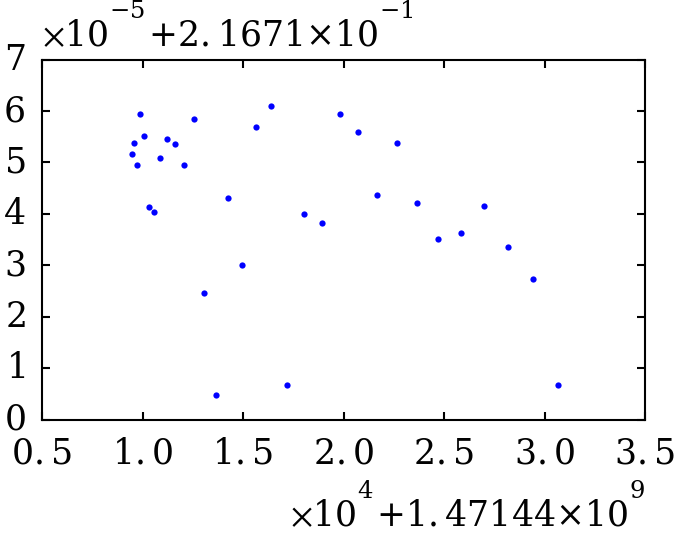

In [10]:
fig, ax = plt.subplots()
ax.plot([sss.stream.epoch for sss in all_sss],
        [sss.state.temperature.primary_package for sss in all_sss],
        '.b')

In [11]:
num_channels = 8
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [12]:
sss_dict

{0: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c30bcd210>,
 1: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c252d4b10>,
 2: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c25082790>,
 3: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c24ea59d0>,
 4: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c24449550>,
 5: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c24259590>,
 6: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c240678d0>,
 7: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f1c23df6490>,
  <kid_readout.measurement.basic.SingleSweepStream at 0x7f1c23c76ed0>]}

Qi: 15377; Qc: 21501
Qi: 39362; Qc: 21731
Qi: 39867; Qc: 21682
Qi: 38988; Qc: 21736


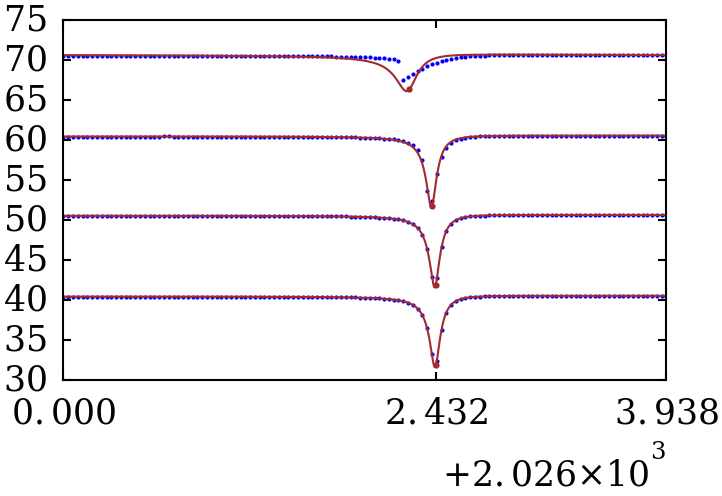

In [13]:
channel = 0
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 22093; Qc: 21183
Qi: 27145; Qc: 20593
Qi: 26871; Qc: 20570
Qi: 26478; Qc: 20642


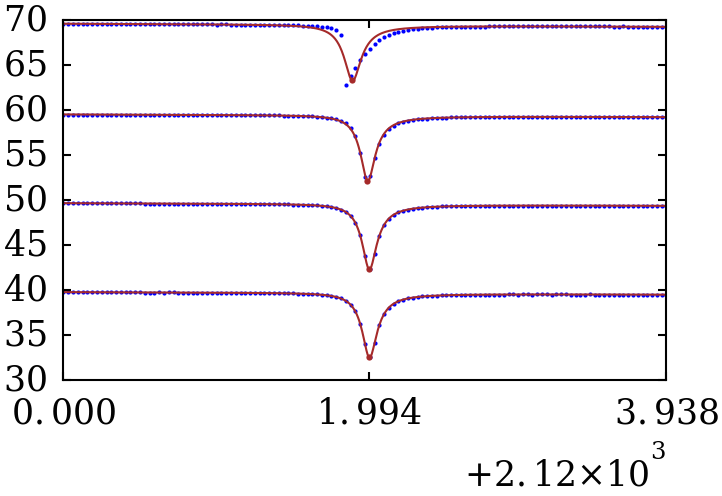

In [14]:
channel = 1
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 27330; Qc: 32647
Qi: 37624; Qc: 26348
Qi: 36240; Qc: 26244
Qi: 35476; Qc: 26257


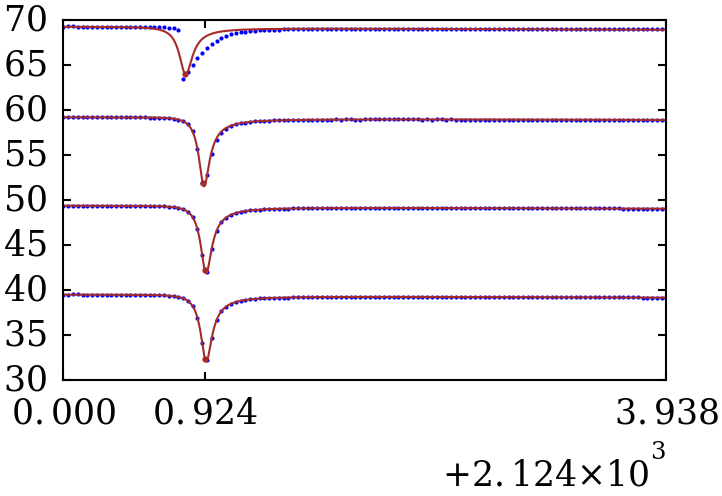

In [15]:
channel = 2
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 3886; Qc: 3513
Qi: 3868; Qc: 3493
Qi: 3857; Qc: 3493
Qi: 3845; Qc: 3504


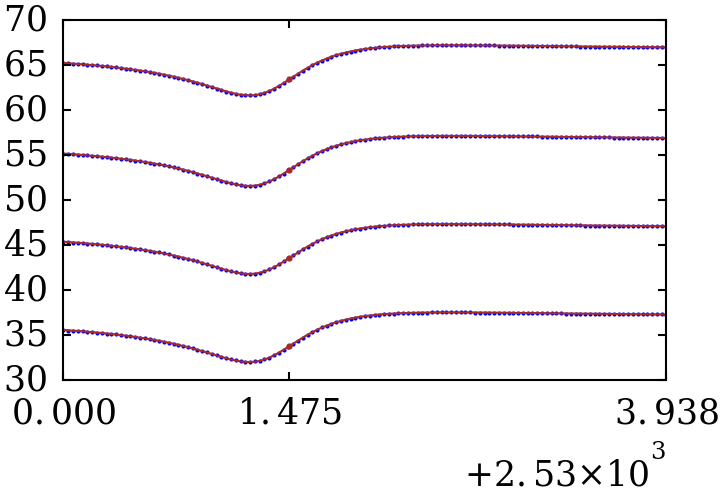

In [16]:
channel = 3
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 2134; Qc: 523
Qi: 2432; Qc: 779
Qi: 2172; Qc: 561
Qi: 2039; Qc: 466


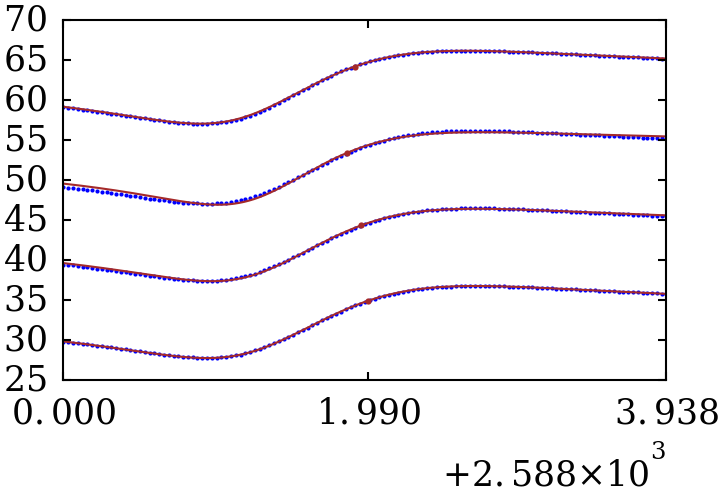

In [17]:
channel = 4
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 4838; Qc: 5956
Qi: 4927; Qc: 6169
Qi: 4912; Qc: 6203
Qi: 4891; Qc: 6276


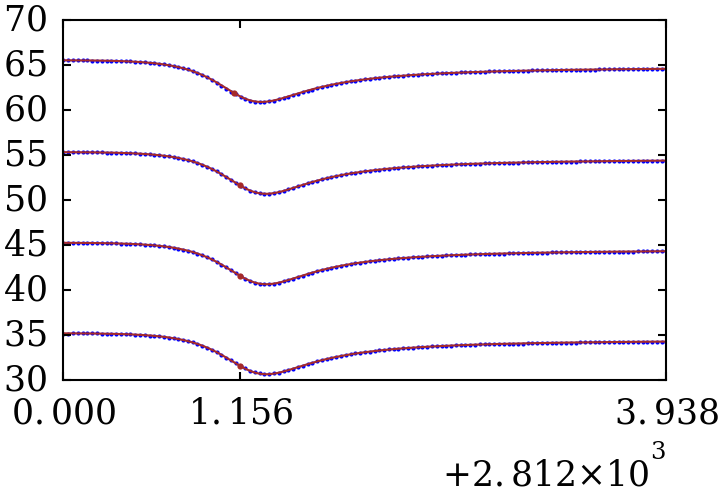

In [18]:
channel = 5
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 5066; Qc: 5449
Qi: 5089; Qc: 5552
Qi: 5076; Qc: 5581
Qi: 5044; Qc: 5609


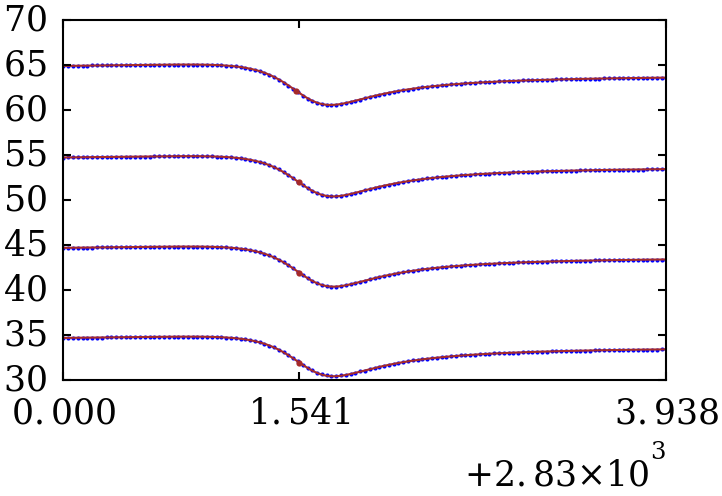

In [19]:
channel = 6
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 18035; Qc: 37900
Qi: 17906; Qc: 37953
Qi: 17305; Qc: 37918
Qi: 17101; Qc: 37836


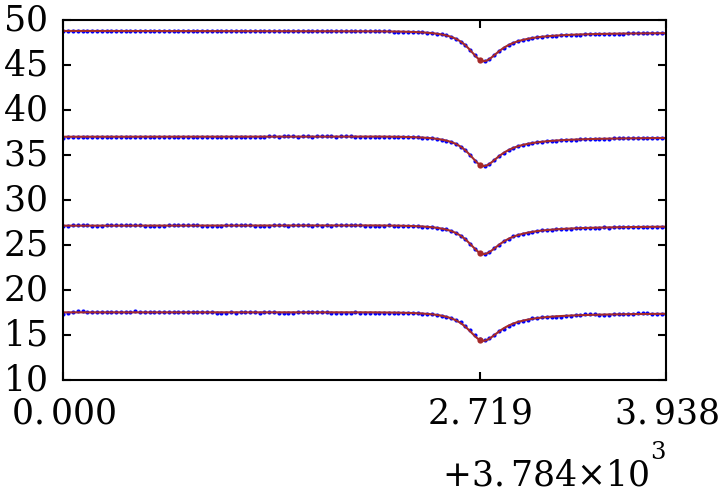

In [20]:
channel = 7
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [21]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

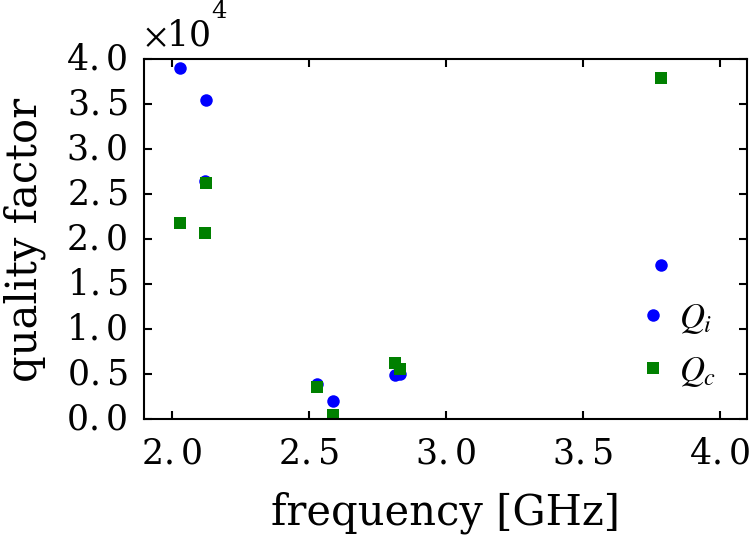

In [22]:
attenuation_index = 3
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='best', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

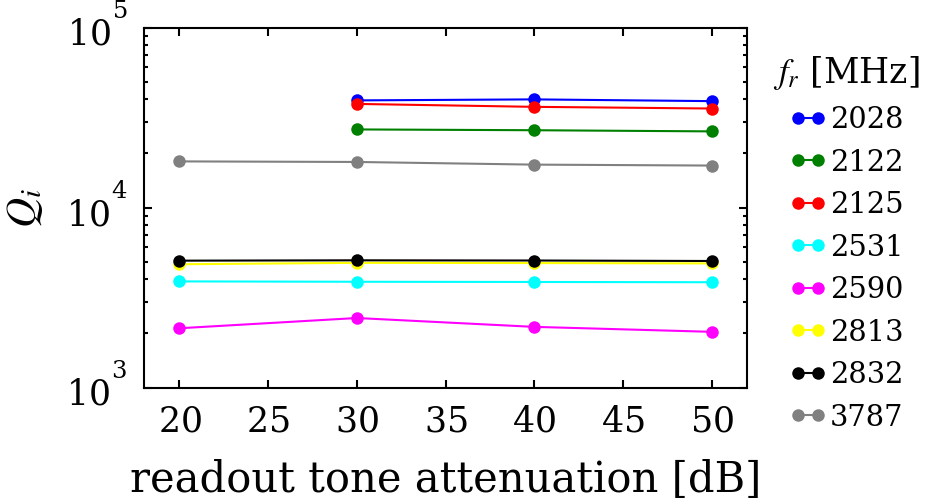

In [23]:
first_good_attenuations = 3 * [1] + 5 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_vs_atten.pdf', bbox_inches='tight')

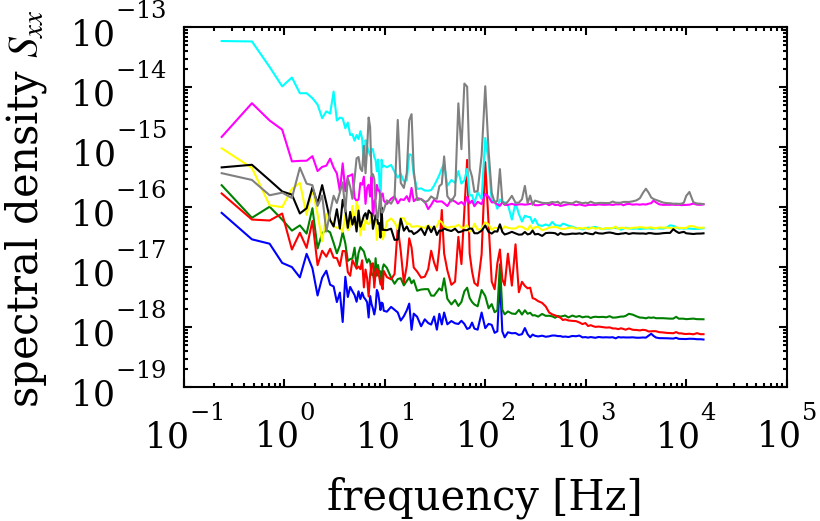

In [24]:
attenuation_index = 1

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')

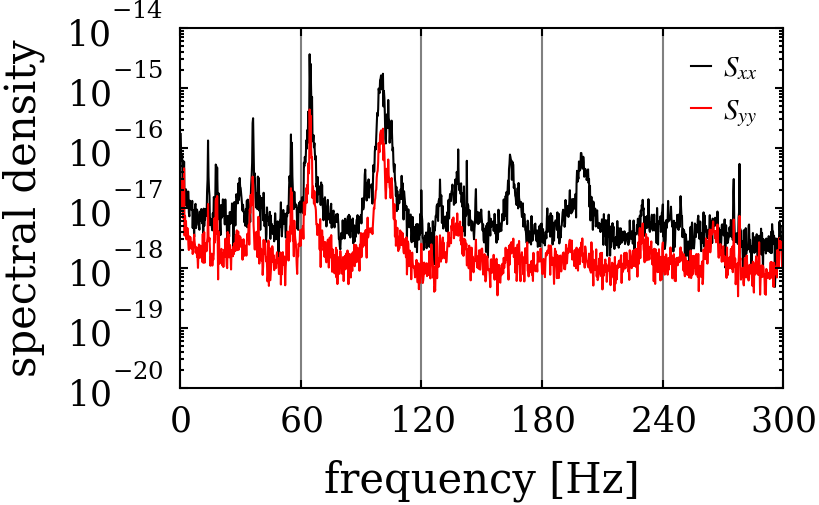

In [26]:
attenuation_index = 1
channel = 2
sss = sss_dict[channel][attenuation_index]
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density')
ax.set_yscale('log')
ax.set_xticks([0, 60, 120, 180, 240, 300])

for f in [60, 120, 180, 240]:
    ax.axvline(f, color='gray')
ax.plot(sss.S_frequency, sss.S_xx, color='k', label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, color='r', label='$S_{yy}$')
ax.legend(loc='upper right', ncol=1, fontsize='xx-small')

ax.set_xlim(0, 300);
#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_channel_0_Sxx_Syy_vs_frequency.pdf', bbox_inches='tight')